# Univariate Analysis

This notebook performs univariate analysis on the customer segmentation dataset. We'll first load the stored variables from our setup notebook.

In [2]:
%store -r

print("Project configuration:")
print(f"SLUG = {SLUG}")
print(f"DATA_DIR = {DATA_DIR}")
print(f"DATASET_KEY = {DATASET_KEY}")
print(f"FIG_DIR = {FIG_DIR}")
print(f"REP_DIR = {REP_DIR}")
print(f"NOTEBOOK_DIR = {NOTEBOOK_DIR}")

missing_vars = [var for var in ['SLUG', 'DATA_DIR', 'FIG_DIR', 'REP_DIR', 'NOTEBOOK_DIR', 'DATASET_KEY'] if var not in globals()]
print(f"Vars not found in globals: {missing_vars}")

# Set default values if variables are not found in store or are empty
if not SLUG:  # Check if empty string
    print(f"{SLUG=} is empty, initializing everything explicitly")
    SLUG = 'customer-segmentation'
    DATASET_KEY = 'vjchoudhary7/customer-segmentation-tutorial-in-python'
    GIT_ROOT = Path.cwd().parent.parent
    DATA_DIR = GIT_ROOT / 'data' / SLUG
    FIG_DIR = GIT_ROOT / 'figures' / SLUG
    REP_DIR = GIT_ROOT / 'reports' / SLUG
    NOTEBOOK_DIR = GIT_ROOT / 'notebooks' / SLUG


Project configuration:
SLUG = customer-segmentation
DATA_DIR = /Users/ravisharma/workdir/eda_practice/data/customer-segmentation
DATASET_KEY = vjchoudhary7/customer-segmentation-tutorial-in-python
FIG_DIR = /Users/ravisharma/workdir/eda_practice/figures/customer-segmentation
REP_DIR = /Users/ravisharma/workdir/eda_practice/reports/customer-segmentation
NOTEBOOK_DIR = /Users/ravisharma/workdir/eda_practice/notebooks/customer-segmentation
Vars not found in globals: []


In [3]:
from pathlib import Path
import pandas as pd


In [4]:
# Downloading data

base_df = pd.DataFrame()

CSV_PATH = Path(DATA_DIR) / "Mall_Customers.csv"
if not CSV_PATH.exists:
    print(f"CSV {CSV_PATH} does not exist. base_df will remain empty.")
else:
    base_df = pd.read_csv(CSV_PATH)
    print(f"CSV {CSV_PATH} loaded successfully.")

base_df.head()

CSV /Users/ravisharma/workdir/eda_practice/data/customer-segmentation/Mall_Customers.csv loaded successfully.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
base_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Analysis Planned
0. Check feature types
   - Identify numerical vs categorical features
   - Create lists for each type

Numerical analyses
1. Descriptive statistics
   - Basics (mean, median, std)
   - Skewness
   - Kurtosis
   - Quantiles

2. Distribution shape tests
   - Shapiro–Wilk
   - D'Agostino–Pearson
   - Jarque–Bera
   - Anderson–Darling

3. Outlier detection
   - IQR method
   - Z-score
   - Modified Z-score (robust)
   - Isolation Forest
   - Local Outlier Factor

4. Visualizations (save to figures/`$slug`/univariate)
   - Histogram
   - KDE / histplot + KDE
   - Violin plot (box + density)
   - Q–Q plot
   - Density plot

Notes
- Keep plots and outputs reproducible (seed where applicable)
- Store generated figures under: `figures/<SLUG>/univariate`

In [7]:
analysis_results = {}

In [8]:
base_df.dtypes
numerical_features = base_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = base_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = base_df.select_dtypes(include=['datetime64']).columns.tolist()
id_column = 'CustomerID'
print(f"{numerical_features=}")
print(f"{categorical_features=}")
print(f"{datetime_features=}")
print(f"{id_column=}")
print("Dropping id columns...")
numerical_features.remove(id_column)
print(f"{numerical_features=}")

numerical_features=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features=['Gender']
datetime_features=[]
id_column='CustomerID'
Dropping id columns...
numerical_features=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [9]:
missing_data = base_df.isnull().sum() # a dataframe
missing_data_pct = missing_data / len(base_df) * 100 # a dataframe with operation done column wise
print(f"{missing_data=}")
print(f"{missing_data_pct=}")

missing_data=CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
missing_data_pct=CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [10]:
analysis_results['dataset'] = {
    "missing_data": missing_data.to_dict(),
    "missing_data_pct": missing_data_pct.to_dict(),
    "numerical_features": numerical_features,
    "categorical_features": categorical_features,
    "datetime_features": datetime_features,
    "shape": base_df.shape
}

In [40]:
base_df['Age'].agg(['count', 'mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurtosis'])

count       200.000000
mean         38.850000
median       36.000000
std          13.969007
var         195.133166
min          18.000000
max          70.000000
skew          0.485569
kurtosis     -0.671573
Name: Age, dtype: float64

In [11]:
from scipy import stats
print(stats.skew(base_df['Age']), stats.kurtosis(base_df['Age']))
# base_df['Age'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.48191947090957177 -0.6847513947723236


In [12]:
base_df['Age'].mode()

0    32
Name: Age, dtype: int64

In [15]:
stats.shapiro(base_df['Age']) 


ShapiroResult(statistic=np.float64(0.9516182290435916), pvalue=np.float64(2.710855723091295e-06))

# Updated Normality Test Function
Here's an improved version of the normality test function with better plot styling and layout:

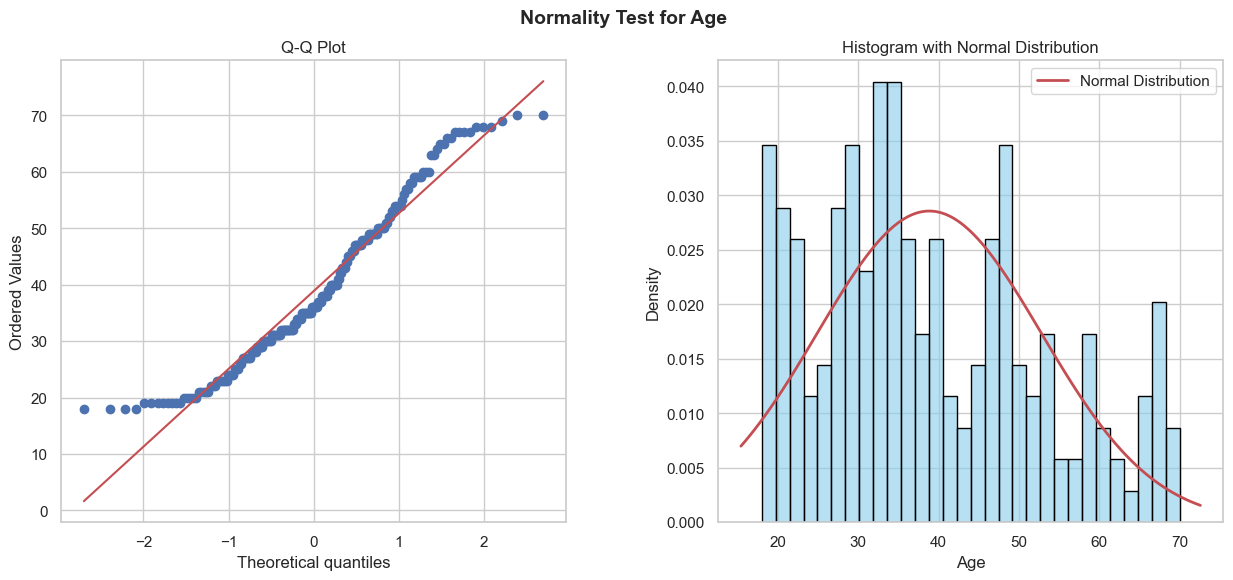


Shapiro-Wilk test results for Age:
--------------------------------------------------
Statistic: 0.9516
p-value: 2.7109e-06

Interpretation:
❌ The data significantly deviates from normal distribution (p < 0.05)


In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_normality_test_v2(data, column_name, save_path=None):
    """
    Performs normality test and creates visualization for a numerical column.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe
    column_name : str
        Name of the column to analyze
    save_path : str or Path, optional
        If provided, saves the plot to this path
    """
    # Extract the data
    col_data = data[column_name].dropna()
    
    # Set style for better visualization
    plt.style.use('default')  # Reset to default style
    sns.set_theme(style="whitegrid")  # Apply seaborn styling
    
    # Create figure with a bit more height for the title
    fig = plt.figure(figsize=(15, 6))
    
    # Create subplot grid with proper spacing
    gs = fig.add_gridspec(1, 2, wspace=0.3)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    # ADD TITLE
    # Places the text at the horizontal center (50%) 
    # and near the top (95%) of the figure.
    # center text horizontally with ha='center'
    # and vertically with va='center'
    # with fontsize 14 and fontweight 'bold'
    fig.text(0.5, 0.95, f'Normality Test for {column_name}', 
             ha='center', va='center', fontsize=14, fontweight='bold')

    # GRAPH 1
    # Create Q-Q plot at position (0, 0) through handle ax1
    stats.probplot(col_data, dist="norm", plot=ax1)
    ax1.set_title("Q-Q Plot")

    # GRAPH 2
    # Create histogram with normal distribution overlay (later)
    # stat='density' normalizes the histogram bars so that their
    # total area sums to 1. This allows it to be directly compared
    # with the probability density function (PDF) of a normal distribution.
    # at (0, 1) through handle ax2
    # alpha=0.6 sets transparency
    sns.histplot(data=col_data, ax=ax2, stat='density', bins=30, 
                alpha=0.6, color='skyblue', edgecolor='black')
    
    # Add normal distribution curve
    xmin, xmax = ax2.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    # Calculates the PDF of a normal distribution using 
    # the mean and standard deviation of our actual data (col_data).
    p = stats.norm.pdf(x, col_data.mean(), col_data.std())
    # Plots this theoretical normal distribution 
    # as a red ('r-'), thick (lw=2) line on top of the histogram.
    ax2.plot(x, p, 'r-', lw=2, label='Normal Distribution')

    ax2.set_title('Histogram with Normal Distribution')
    ax2.set_xlabel(column_name)
    ax2.legend()
    
    # SAVE PLOTS
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(col_data)
    
    print(f"\nShapiro-Wilk test results for {column_name}:")
    print("-" * 50)
    print(f"Statistic: {stat:.4f}")
    print(f"p-value: {p_value:.4e}")
    print("\nInterpretation:")
    if p_value < 0.05:
        print("❌ The data significantly deviates from normal distribution (p < 0.05)")
    else:
        print("✅ The data appears to be normally distributed (p >= 0.05)")
    
    return stat, p_value

# Test the updated function with 'Age' column
save_path = Path(FIG_DIR) / 'univariate' / 'age_normality_test_v2.png'
if not save_path.parent.exists():
    save_path.parent.mkdir(parents=True)

stat, p_value = plot_normality_test_v2(base_df, 'Age', save_path)

In [14]:
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=4, width=80, sort_dicts=False)

univariate_analysis = {}

numerical_features = analysis_results['dataset']['numerical_features']

print("Analysing numerical features: %s", numerical_features)
print("="*40)

numerical_df = base_df[numerical_features]

for numerical_feature in numerical_features:
    col = numerical_feature
    print("-"*40)
    print(f"Analyzing {numerical_feature}")
    print("-"*40)
    
    # checks before processing column
    col_data = numerical_df[col].dropna()

    if len(col_data) == 0:
        print(f"Column {col} has no data after dropping NA, skipping...")
        continue
    
    qtls = col_data.quantile([0.25, 0.5, 0.75, 0.95, 0.99])
    
    stats_dict = {
        'count' : len(col_data),
        'mean' : col_data.mean(),
        'median' : col_data.median(),
        'mode' : col_data.mode().values[0] if not col_data.mode().empty else None,
        'std' : col_data.std(),
        'var' : col_data.var(),
        'min' : col_data.min(),
        'max' : col_data.max(),
        'skew' : stats.skew(col_data),
        'kurtosis' : stats.kurtosis(col_data),
        'quantiles' : qtls.to_dict()
    }

    univariate_analysis[col] = stats_dict

    # print("Basic Statistics:")
    # print(col_data.describe())
    
    # Configure pretty printer for better formatting
    
    # print("\nDetailed Statistics:")
    # pp.pprint(stats_dict)

    # print("\nSkewness and Kurtosis:")
    # print(stats.skew(col_data), stats.kurtosis(col_data))

    # print("\nQuantiles:")
    # print(qtls)

    # Outlier analysis
    

Analysing numerical features: %s ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
----------------------------------------
Analyzing Age
----------------------------------------

Detailed Statistics:
{   'count': 200,
    'mean': np.float64(38.85),
    'median': np.float64(36.0),
    'mode': np.int64(32),
    'std': np.float64(13.96900733155888),
    'var': np.float64(195.13316582914572),
    'min': np.int64(18),
    'max': np.int64(70),
    'skew': np.float64(0.48191947090957177),
    'kurtosis': np.float64(-0.6847513947723236),
    'quantiles': {   0.25: 28.75,
                     0.5: 36.0,
                     0.75: 49.0,
                     0.95: 66.04999999999998,
                     0.99: 69.00999999999999}}

Skewness and Kurtosis:
0.48191947090957177 -0.6847513947723236

Quantiles:
0.25    28.75
0.50    36.00
0.75    49.00
0.95    66.05
0.99    69.01
Name: Age, dtype: float64
----------------------------------------
Analyzing Annual Income (k$)
-----------------------